Data Collection for I320D ML Project. Looking for financial data that will enable us to an individual stock crash. Will need time series data for price, company actions, finances, and macroeconomic indicators as factors. 

Data Collection Periods: 01/01/2005 - 01/01/2010 and 01/01/2020 - 03/30/2023. The first period will primarily be used as a training set and the more recent period will be used for testing.

### NBER Recession Indicators for the United States

These are daily indicators of whether or not the United States is currently in a recession, with 0 = no and 1 = yes. Downloaded from the St. Louis Fed FRED Economic Database. These values will likely be used as our main labels.

In [1]:
import pandas as pd

us_rec = pd.read_csv(r'Macroeconomic_Data\05_10_USRECD.csv')
us_rec

,DATE,USRECD
0,2005-01-01,0
1,2005-01-02,0
2,2005-01-03,0
3,2005-01-04,0
4,2005-01-05,0
...,...,...
1822,2009-12-28,0
1823,2009-12-29,0
1824,2009-12-30,0
1825,2009-12-31,0


## Collection of Further Macroeconomic Indicators

- T10YIE: 10-Year Breakeven Inflation Rate
- T10Y2Y: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
- DFF: Federal Funds Effective Rate
- SP500: S&P 500
- VIXCLS: Volatility Index

### Collecting Security Data

Daily data for the SVB stock:

In [2]:
import yfinance as yf

svb_p1 = yf.download("SIVB", start="2005-01-01", end="2010-01-01")
svb_p1.to_csv("svb_p1.csv")
svb_p1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,44.580002,45.259998,44.459999,44.799999,44.799999,453265
2005-01-04,44.799999,45.060001,44.029999,44.200001,44.200001,368711
2005-01-05,44.040001,44.490002,43.820000,43.910000,43.910000,663902
2005-01-06,44.099998,44.500000,43.889999,44.200001,44.200001,349635
2005-01-07,44.330002,44.529999,43.380001,43.430000,43.430000,300137
...,...,...,...,...,...,...
2009-12-24,41.810001,42.470001,41.590000,42.430000,42.430000,156518
2009-12-28,42.340000,42.680000,41.720001,41.950001,41.950001,303056
2009-12-29,42.080002,42.480000,41.849998,42.220001,42.220001,245109


In [3]:
svb_p2 = yf.download("SIVB", start="2020-01-01", end="2023-03-31")
svb_p2.to_csv("svb_p2.csv")
svb_p2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,252.649994,254.279999,249.669998,254.270004,254.270004,242917
2020-01-03,247.960007,251.119995,246.800003,250.330002,250.330002,476454
2020-01-06,246.839996,249.800003,245.059998,249.240005,249.240005,491021
2020-01-07,248.660004,251.119995,247.580002,250.399994,250.399994,501982
2020-01-08,249.820007,254.115005,249.130005,252.779999,252.779999,502032
...,...,...,...,...,...,...
2023-03-24,106.040001,106.040001,106.040001,106.040001,106.040001,0
2023-03-27,106.040001,106.040001,106.040001,106.040001,106.040001,0
2023-03-28,0.530000,0.740000,0.010000,0.400000,0.400000,84502118


## Feature Engineering

### Creating Price Percentile vs Self

First, adding a column for the percentile of the price in the last 30 days, judging price by the adjusted close price.

In [4]:
from scipy import stats
import numpy as np

# Change this variable assignment to rerun on a different df
df = svb_p1

close = df['Adj Close']
percentiles = []

for i, val in enumerate(close):

    # Selecting last 30 days of prices
    last_30 = close[i-30: i]

    # Calculating percentile of current price in respect to the last 30
    if np.any(last_30):
        median = stats.percentileofscore(last_30, close[i])
        percentiles.append(median)
    else:
        percentiles.append(np.NaN)

df["percentile_last_30"] = percentiles
df

,Open,High,Low,Close,Adj Close,Volume,percentile_last_30
Date,,,,,,,
2005-01-03,44.580002,45.259998,44.459999,44.799999,44.799999,453265,NaN
2005-01-04,44.799999,45.060001,44.029999,44.200001,44.200001,368711,NaN
2005-01-05,44.040001,44.490002,43.820000,43.910000,43.910000,663902,NaN
2005-01-06,44.099998,44.500000,43.889999,44.200001,44.200001,349635,NaN
2005-01-07,44.330002,44.529999,43.380001,43.430000,43.430000,300137,NaN
...,...,...,...,...,...,...,...
2009-12-24,41.810001,42.470001,41.590000,42.430000,42.430000,156518,96.666667
2009-12-28,42.340000,42.680000,41.720001,41.950001,41.950001,303056,90.000000
2009-12-29,42.080002,42.480000,41.849998,42.220001,42.220001,245109,93.333333


### Adding Previous Row Prices as Columns

In [5]:
df_t1 = df.iloc[:, 0:6].shift()
df_t1 = df_t1.add_suffix('_t1')
df_t1
df = pd.merge(df, df_t1, on=df.index)
df


,key_0,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,Low_t1,Close_t1,Adj Close_t1,Volume_t1
0,2005-01-03,44.580002,45.259998,44.459999,44.799999,44.799999,453265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-04,44.799999,45.060001,44.029999,44.200001,44.200001,368711,NaN,44.580002,45.259998,44.459999,44.799999,44.799999,453265.0
2,2005-01-05,44.040001,44.490002,43.820000,43.910000,43.910000,663902,NaN,44.799999,45.060001,44.029999,44.200001,44.200001,368711.0
3,2005-01-06,44.099998,44.500000,43.889999,44.200001,44.200001,349635,NaN,44.040001,44.490002,43.820000,43.910000,43.910000,663902.0
4,2005-01-07,44.330002,44.529999,43.380001,43.430000,43.430000,300137,NaN,44.099998,44.500000,43.889999,44.200001,44.200001,349635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2009-12-24,41.810001,42.470001,41.590000,42.430000,42.430000,156518,96.666667,41.230000,41.959999,41.160000,41.880001,41.880001,457206.0
1255,2009-12-28,42.340000,42.680000,41.720001,41.950001,41.950001,303056,90.000000,41.810001,42.470001,41.590000,42.430000,42.430000,156518.0
1256,2009-12-29,42.080002,42.480000,41.849998,42.220001,42.220001,245109,93.333333,42.340000,42.680000,41.720001,41.950001,41.950001,303056.0
1257,2009-12-30,41.700001,42.470001,41.700001,42.320000,42.320000,297226,93.333333,42.080002,42.480000,41.849998,42.220001,42.220001,245109.0


In [6]:
df = df.rename(columns={"key_0": "Date"})
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,Low_t1,Close_t1,Adj Close_t1,Volume_t1
0,2005-01-03,44.580002,45.259998,44.459999,44.799999,44.799999,453265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-04,44.799999,45.060001,44.029999,44.200001,44.200001,368711,NaN,44.580002,45.259998,44.459999,44.799999,44.799999,453265.0
2,2005-01-05,44.040001,44.490002,43.820000,43.910000,43.910000,663902,NaN,44.799999,45.060001,44.029999,44.200001,44.200001,368711.0
3,2005-01-06,44.099998,44.500000,43.889999,44.200001,44.200001,349635,NaN,44.040001,44.490002,43.820000,43.910000,43.910000,663902.0
4,2005-01-07,44.330002,44.529999,43.380001,43.430000,43.430000,300137,NaN,44.099998,44.500000,43.889999,44.200001,44.200001,349635.0


### Adding Macro Data into Dataframe

In [7]:
from functools import reduce

t10y2y = pd.read_csv(r'Macroeconomic_Data\T10Y2Y.csv')
t10yie = pd.read_csv(r'Macroeconomic_Data\T10YIE.csv')
dff = pd.read_csv(r'Macroeconomic_Data\DFF.csv')
vix = pd.read_csv(r'Macroeconomic_Data\VIXCLS.csv')

to_merge = [t10y2y, t10yie, dff, vix]

period1_macro = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],
                                            how='outer'), to_merge)

period1_macro

,DATE,T10Y2Y,T10YIE,DFF,VIXCLS
0,2005-01-03,1.13,2.53,2.31,14.08
1,2005-01-04,1.09,2.51,2.25,13.98
2,2005-01-05,1.07,2.50,2.25,14.09
3,2005-01-06,1.11,2.53,2.25,13.58
4,2005-01-07,1.09,2.49,2.24,13.49
...,...,...,...,...,...
1822,2009-12-13,NaN,NaN,0.12,NaN
1823,2009-12-19,NaN,NaN,0.12,NaN
1824,2009-12-20,NaN,NaN,0.12,NaN
1825,2009-12-26,NaN,NaN,0.11,NaN


In [8]:
period1_macro = period1_macro.dropna()
period1_macro

,DATE,T10Y2Y,T10YIE,DFF,VIXCLS
0,2005-01-03,1.13,2.53,2.31,14.08
1,2005-01-04,1.09,2.51,2.25,13.98
2,2005-01-05,1.07,2.50,2.25,14.09
3,2005-01-06,1.11,2.53,2.25,13.58
4,2005-01-07,1.09,2.49,2.24,13.49
...,...,...,...,...,...
1300,2009-12-28,2.76,2.35,0.12,19.93
1301,2009-12-29,2.73,2.36,0.12,20.01
1302,2009-12-30,2.72,2.36,0.11,19.96
1303,2009-12-31,2.71,2.37,0.05,21.68


### Cleaning Macro Data

If the value is '.', assign to previous day's value.

In [9]:
# Replacing periods with None
import numpy as np

macro_cols = period1_macro.columns[1:]

for col in macro_cols:
    period1_macro[col] = period1_macro[col].replace('.', np.NaN, regex=False)

period1_macro = period1_macro.fillna(method='ffill')
period1_macro = period1_macro.dropna()
period1_macro

C:\Users\micha\AppData\Local\Temp\ipykernel_17772\2744450250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period1_macro[col] = period1_macro[col].replace('.', np.NaN, regex=False)


,DATE,T10Y2Y,T10YIE,DFF,VIXCLS
0,2005-01-03,1.13,2.53,2.31,14.08
1,2005-01-04,1.09,2.51,2.25,13.98
2,2005-01-05,1.07,2.50,2.25,14.09
3,2005-01-06,1.11,2.53,2.25,13.58
4,2005-01-07,1.09,2.49,2.24,13.49
...,...,...,...,...,...
1300,2009-12-28,2.76,2.35,0.12,19.93
1301,2009-12-29,2.73,2.36,0.12,20.01
1302,2009-12-30,2.72,2.36,0.11,19.96
1303,2009-12-31,2.71,2.37,0.05,21.68


In [10]:
period1_macro['DATE'] = period1_macro['DATE'].astype('datetime64[ns]')

df_features = pd.merge(df, period1_macro, left_on=['Date'], right_on=['DATE'])
df_features.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,Low_t1,Close_t1,Adj Close_t1,Volume_t1,DATE,T10Y2Y,T10YIE,DFF,VIXCLS
0,2005-01-03,44.580002,45.259998,44.459999,44.799999,44.799999,453265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-03,1.13,2.53,2.31,14.08
1,2005-01-04,44.799999,45.060001,44.029999,44.200001,44.200001,368711,NaN,44.580002,45.259998,44.459999,44.799999,44.799999,453265.0,2005-01-04,1.09,2.51,2.25,13.98
2,2005-01-05,44.040001,44.490002,43.820000,43.910000,43.910000,663902,NaN,44.799999,45.060001,44.029999,44.200001,44.200001,368711.0,2005-01-05,1.07,2.50,2.25,14.09
3,2005-01-06,44.099998,44.500000,43.889999,44.200001,44.200001,349635,NaN,44.040001,44.490002,43.820000,43.910000,43.910000,663902.0,2005-01-06,1.11,2.53,2.25,13.58
4,2005-01-07,44.330002,44.529999,43.380001,43.430000,43.430000,300137,NaN,44.099998,44.500000,43.889999,44.200001,44.200001,349635.0,2005-01-07,1.09,2.49,2.24,13.49


### Adding S&P 500 Daily Data

In [11]:
import yfinance as yf

sp500 = yf.download("^GSPC", start="2005-01-01", end="2010-01-01")
sp500 = sp500.add_suffix('_SP500')
sp500.head()

[*********************100%***********************]  1 of 1 completed


,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500
Date,,,,,,
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000


In [12]:
df_features = pd.merge(df_features, sp500, left_on=['Date'], right_on=sp500.index)

In [13]:
df_features

,Date,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,...,T10Y2Y,T10YIE,DFF,VIXCLS,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500
0,2005-01-03,44.580002,45.259998,44.459999,44.799999,44.799999,453265,NaN,NaN,NaN,...,1.13,2.53,2.31,14.08,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
1,2005-01-04,44.799999,45.060001,44.029999,44.200001,44.200001,368711,NaN,44.580002,45.259998,...,1.09,2.51,2.25,13.98,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2,2005-01-05,44.040001,44.490002,43.820000,43.910000,43.910000,663902,NaN,44.799999,45.060001,...,1.07,2.50,2.25,14.09,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
3,2005-01-06,44.099998,44.500000,43.889999,44.200001,44.200001,349635,NaN,44.040001,44.490002,...,1.11,2.53,2.25,13.58,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
4,2005-01-07,44.330002,44.529999,43.380001,43.430000,43.430000,300137,NaN,44.099998,44.500000,...,1.09,2.49,2.24,13.49,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2009-12-24,41.810001,42.470001,41.590000,42.430000,42.430000,156518,96.666667,41.230000,41.959999,...,2.82,2.32,0.11,19.47,1121.079956,1126.479980,1121.079956,1126.479980,1126.479980,1267710000
1255,2009-12-28,42.340000,42.680000,41.720001,41.950001,41.950001,303056,90.000000,41.810001,42.470001,...,2.76,2.35,0.12,19.93,1127.530029,1130.380005,1123.510010,1127.780029,1127.780029,2716400000
1256,2009-12-29,42.080002,42.480000,41.849998,42.220001,42.220001,245109,93.333333,42.340000,42.680000,...,2.73,2.36,0.12,20.01,1128.550049,1130.380005,1126.079956,1126.199951,1126.199951,2491020000
1257,2009-12-30,41.700001,42.470001,41.700001,42.320000,42.320000,297226,93.333333,42.080002,42.480000,...,2.72,2.36,0.11,19.96,1125.530029,1126.420044,1121.939941,1126.420044,1126.420044,2277300000


### Adding Label Column

In [14]:
us_rec['DATE'] = us_rec['DATE'].astype('datetime64[ns]')

df_labeled = pd.merge(df_features, us_rec, left_on=['DATE'], right_on=['DATE'])
df_labeled.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,...,T10YIE,DFF,VIXCLS,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500,USRECD
0,2005-01-03,44.580002,45.259998,44.459999,44.799999,44.799999,453265,NaN,NaN,NaN,...,2.53,2.31,14.08,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000,0
1,2005-01-04,44.799999,45.060001,44.029999,44.200001,44.200001,368711,NaN,44.580002,45.259998,...,2.51,2.25,13.98,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,0
2,2005-01-05,44.040001,44.490002,43.820000,43.910000,43.910000,663902,NaN,44.799999,45.060001,...,2.50,2.25,14.09,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,0
3,2005-01-06,44.099998,44.500000,43.889999,44.200001,44.200001,349635,NaN,44.040001,44.490002,...,2.53,2.25,13.58,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,0
4,2005-01-07,44.330002,44.529999,43.380001,43.430000,43.430000,300137,NaN,44.099998,44.500000,...,2.49,2.24,13.49,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000,0


In [15]:
df_labeled = df_labeled.dropna()
df_labeled = df_labeled.drop(columns='DATE', axis=1)
df_labeled.to_csv('labelled_data_period1.csv')
df_labeled

,Date,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,...,T10YIE,DFF,VIXCLS,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500,USRECD
30,2005-02-15,44.150002,44.529999,43.790001,43.950001,43.950001,165399,56.666667,44.650002,44.930000,...,2.49,2.53,11.27,1206.140015,1212.439941,1205.520020,1210.119995,1210.119995,1527080000,0
31,2005-02-16,43.990002,44.660000,43.910000,44.450001,44.450001,232170,76.666667,44.150002,44.529999,...,2.51,2.48,11.10,1210.119995,1212.439941,1205.060059,1210.339966,1210.339966,1490100000,0
32,2005-02-17,44.320000,44.520000,43.509998,43.520000,43.520000,225170,50.000000,43.990002,44.660000,...,2.54,2.50,11.77,1210.339966,1211.329956,1200.739990,1200.750000,1200.750000,1580120000,0
33,2005-02-18,43.380001,43.730000,42.959999,43.009998,43.009998,259199,43.333333,44.320000,44.520000,...,2.60,2.51,11.18,1200.750000,1202.920044,1197.349976,1201.589966,1201.589966,1551200000,0
34,2005-02-22,43.009998,43.400002,42.250000,42.610001,42.610001,280175,40.000000,43.380001,43.730000,...,2.62,2.57,13.14,1201.589966,1202.479980,1184.160034,1184.160034,1184.160034,1744940000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2009-12-24,41.810001,42.470001,41.590000,42.430000,42.430000,156518,96.666667,41.230000,41.959999,...,2.32,0.11,19.47,1121.079956,1126.479980,1121.079956,1126.479980,1126.479980,1267710000,0
1255,2009-12-28,42.340000,42.680000,41.720001,41.950001,41.950001,303056,90.000000,41.810001,42.470001,...,2.35,0.12,19.93,1127.530029,1130.380005,1123.510010,1127.780029,1127.780029,2716400000,0
1256,2009-12-29,42.080002,42.480000,41.849998,42.220001,42.220001,245109,93.333333,42.340000,42.680000,...,2.36,0.12,20.01,1128.550049,1130.380005,1126.079956,1126.199951,1126.199951,2491020000,0
1257,2009-12-30,41.700001,42.470001,41.700001,42.320000,42.320000,297226,93.333333,42.080002,42.480000,...,2.36,0.11,19.96,1125.530029,1126.420044,1121.939941,1126.420044,1126.420044,2277300000,0


## Scaling
### Applying Standard Scaling

In [16]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Leaving out date column
df_features = df_features.drop(columns='DATE', axis=1)

all_columns = df_features.columns[1:]
scaler.fit(df_features[all_columns])

df_features[all_columns] = scaler.transform(df_features[all_columns])

df_features.head()

# Adding 

,Date,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,...,T10Y2Y,T10YIE,DFF,VIXCLS,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500
0,2005-01-03,-0.008555,-0.008174,0.047273,0.011952,0.011952,-0.198305,NaN,NaN,NaN,...,0.209647,0.686082,-0.383670,-0.593336,-0.101169,-0.115271,-0.112968,-0.150119,-0.150119,-1.223083
1,2005-01-04,0.015261,-0.029749,0.000592,-0.053223,-0.053223,-0.403868,NaN,-0.008757,-0.008416,...,0.167299,0.649046,-0.414562,-0.601350,-0.149999,-0.175116,-0.186459,-0.219752,-0.219752,-1.101886
2,2005-01-05,-0.067014,-0.091240,-0.022206,-0.084724,-0.084724,0.313785,NaN,0.015050,-0.029983,...,0.146125,0.630528,-0.414562,-0.592534,-0.219619,-0.240716,-0.194680,-0.241143,-0.241143,-1.091565
3,2005-01-06,-0.060519,-0.090162,-0.014607,-0.053223,-0.053223,-0.450244,NaN,-0.067194,-0.091452,...,0.188473,0.686082,-0.414562,-0.633406,-0.241007,-0.246220,-0.196895,-0.220546,-0.220546,-1.189468
4,2005-01-07,-0.035620,-0.086926,-0.069973,-0.136863,-0.136863,-0.570581,NaN,-0.060701,-0.090374,...,0.167299,0.612010,-0.419711,-0.640619,-0.220414,-0.243368,-0.202359,-0.228984,-0.228984,-1.242052


Creating Labeled and scaled df

In [17]:

df_labeled_scaled = pd.merge(df_features, us_rec, left_on=['Date'], right_on=['DATE'])
df_labeled_scaled = df_labeled_scaled.dropna()
df_labeled_scaled = df_labeled_scaled.drop(columns='DATE', axis=1)
df_labeled_scaled.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,...,T10YIE,DFF,VIXCLS,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500,USRECD
30,2005-02-15,-0.055106,-0.086926,-0.025463,-0.080379,-0.080379,-0.898149,0.148018,-0.001182,-0.044003,...,0.612010,-0.270397,-0.818530,-0.129852,-0.142092,-0.087372,-0.110215,-0.110215,-1.213696,0
31,2005-02-16,-0.072427,-0.072901,-0.012436,-0.026066,-0.026066,-0.735819,0.711801,-0.055290,-0.087139,...,0.649046,-0.296141,-0.832153,-0.110102,-0.142092,-0.089636,-0.109123,-0.109123,-1.235018,0
32,2005-02-17,-0.036702,-0.088004,-0.055860,-0.127087,-0.127087,-0.752837,-0.039910,-0.072605,-0.073120,...,0.704601,-0.285844,-0.778459,-0.109010,-0.147646,-0.110901,-0.156720,-0.156720,-1.183114,0
33,2005-02-18,-0.138463,-0.173229,-0.115569,-0.182486,-0.182486,-0.670108,-0.227837,-0.036893,-0.088217,...,0.815709,-0.280695,-0.825742,-0.156598,-0.189727,-0.127588,-0.152551,-0.152551,-1.199789,0
34,2005-02-22,-0.178518,-0.208829,-0.192648,-0.225935,-0.225935,-0.619112,-0.321801,-0.138617,-0.173411,...,0.852746,-0.249802,-0.668668,-0.152430,-0.191929,-0.192514,-0.239059,-0.239059,-1.088082,0


In [18]:
df_labeled_scaled.to_csv('labelled_scaled_period1.csv')

In [19]:
df_labeled_scaled

,Date,Open,High,Low,Close,Adj Close,Volume,percentile_last_30,Open_t1,High_t1,...,T10YIE,DFF,VIXCLS,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500,USRECD
30,2005-02-15,-0.055106,-0.086926,-0.025463,-0.080379,-0.080379,-0.898149,0.148018,-0.001182,-0.044003,...,0.612010,-0.270397,-0.818530,-0.129852,-0.142092,-0.087372,-0.110215,-0.110215,-1.213696,0
31,2005-02-16,-0.072427,-0.072901,-0.012436,-0.026066,-0.026066,-0.735819,0.711801,-0.055290,-0.087139,...,0.649046,-0.296141,-0.832153,-0.110102,-0.142092,-0.089636,-0.109123,-0.109123,-1.235018,0
32,2005-02-17,-0.036702,-0.088004,-0.055860,-0.127087,-0.127087,-0.752837,-0.039910,-0.072605,-0.073120,...,0.704601,-0.285844,-0.778459,-0.109010,-0.147646,-0.110901,-0.156720,-0.156720,-1.183114,0
33,2005-02-18,-0.138463,-0.173229,-0.115569,-0.182486,-0.182486,-0.670108,-0.227837,-0.036893,-0.088217,...,0.815709,-0.280695,-0.825742,-0.156598,-0.189727,-0.127588,-0.152551,-0.152551,-1.199789,0
34,2005-02-22,-0.178518,-0.208829,-0.192648,-0.225935,-0.225935,-0.619112,-0.321801,-0.138617,-0.173411,...,0.852746,-0.249802,-0.668668,-0.152430,-0.191929,-0.192514,-0.239059,-0.239059,-1.088082,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2009-12-24,-0.308426,-0.309157,-0.264299,-0.245487,-0.245487,-0.919740,1.275583,-0.371282,-0.364289,...,0.297202,-1.516395,-0.161381,-0.551945,-0.572215,-0.503019,-0.525334,-0.525334,-1.363244,0
1255,2009-12-28,-0.251050,-0.286502,-0.250186,-0.297627,-0.297627,-0.563485,1.087656,-0.308516,-0.309290,...,0.352756,-1.511246,-0.124516,-0.519938,-0.552700,-0.491057,-0.518882,-0.518882,-0.527958,0
1256,2009-12-29,-0.279197,-0.308078,-0.236073,-0.268298,-0.268298,-0.704362,1.181620,-0.251162,-0.286644,...,0.371274,-1.511246,-0.118105,-0.514876,-0.552700,-0.478407,-0.526724,-0.526724,-0.657908,0
1257,2009-12-30,-0.320334,-0.309157,-0.252357,-0.257436,-0.257436,-0.577658,1.181620,-0.279298,-0.308212,...,0.371274,-1.516395,-0.122112,-0.529863,-0.572515,-0.498786,-0.525632,-0.525632,-0.781134,0


Counting Days in Recession for Period 1

In [22]:
df_labeled_scaled.describe

<bound method NDFrame.describe of            Date      Open      High       Low     Close  Adj Close    Volume  \
30   2005-02-15 -0.055106 -0.086926 -0.025463 -0.080379  -0.080379 -0.898149   
31   2005-02-16 -0.072427 -0.072901 -0.012436 -0.026066  -0.026066 -0.735819   
32   2005-02-17 -0.036702 -0.088004 -0.055860 -0.127087  -0.127087 -0.752837   
33   2005-02-18 -0.138463 -0.173229 -0.115569 -0.182486  -0.182486 -0.670108   
34   2005-02-22 -0.178518 -0.208829 -0.192648 -0.225935  -0.225935 -0.619112   
...         ...       ...       ...       ...       ...        ...       ...   
1254 2009-12-24 -0.308426 -0.309157 -0.264299 -0.245487  -0.245487 -0.919740   
1255 2009-12-28 -0.251050 -0.286502 -0.250186 -0.297627  -0.297627 -0.563485   
1256 2009-12-29 -0.279197 -0.308078 -0.236073 -0.268298  -0.268298 -0.704362   
1257 2009-12-30 -0.320334 -0.309157 -0.252357 -0.257436  -0.257436 -0.577658   
1258 2009-12-31 -0.257546 -0.308078 -0.264299 -0.329128  -0.329128 -0.711746   

     

### Correlation Matrix

Testing...

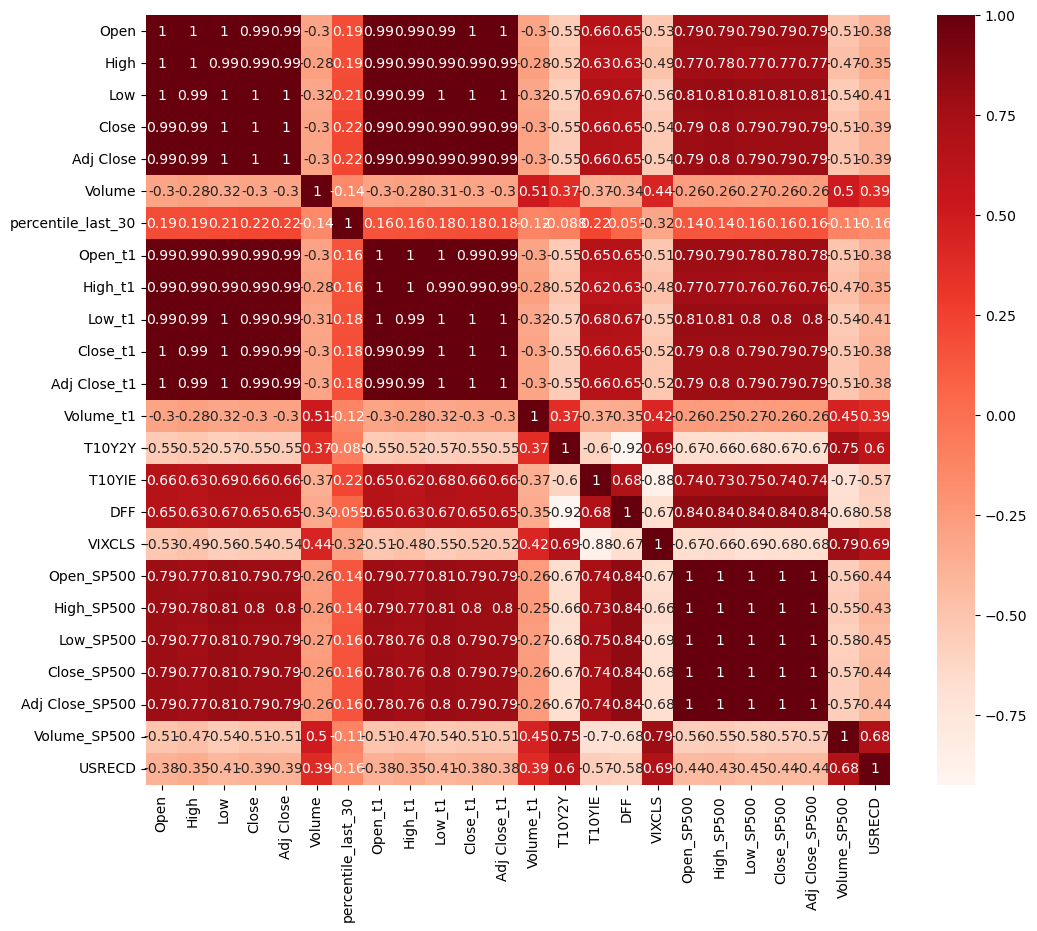

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
cor = df_labeled_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


Many features are indeed highly correlated. For now, can include them in the model and perform feature selection later. The high multicollinearity would be a problem if we were to use a model like logistic regression that use all features in their beta weights.

Note on multicollinearity: this is definitely a problem for algorithims like logistic regression. However, [tree-based algorithims seem immune to this problem](https://datascience.stackexchange.com/questions/12554/does-xgboost-handle-multicollinearity-by-itself), so if a tree algorithim has the highest classification metrics, that is a possible explanation. However, we do still need to deal with overfitting.